In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
from sklearn.datasets import fetch_california_housing
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
input_data=fetch_california_housing()['data']
description=fetch_california_housing()['DESCR']
output_data=fetch_california_housing()['target']
target_feature=fetch_california_housing()['target_names']
input_feature=fetch_california_housing()['feature_names']


In [6]:
house_df=pd.DataFrame(input_data,columns=input_feature)
house_df['MedHouseVal'] = output_data
house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**VIF**

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=house_df.drop('MedHouseVal',axis=1)
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
vif_data

,feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [8]:
featatue_to_keep=vif_data[vif_data['VIF']<15]['feature'].to_list()
featatue_to_keep

['MedInc', 'HouseAge', 'Population', 'AveOccup']

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sacled=pd.DataFrame(sc.fit_transform(house_df[featatue_to_keep]),columns=featatue_to_keep)
data_sacled['MedHouseVal']=house_df['MedHouseVal']
data_sacled

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,2.344766,0.982143,-0.974429,-0.049597,4.526
1,2.332238,-0.607019,0.861439,-0.092512,3.585
2,1.782699,1.856182,-0.820777,-0.025843,3.521
3,0.932968,1.856182,-0.766028,-0.050329,3.413
4,-0.012881,1.856182,-0.759847,-0.085616,3.422
...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.512592,-0.049110,0.781
20636,-0.691593,-0.845393,-0.944405,0.005021,0.771
20637,-1.142593,-0.924851,-0.369537,-0.071735,0.923
20638,-1.054583,-0.845393,-0.604429,-0.091225,0.847


In [10]:
x=data_sacled.drop('MedHouseVal',axis=1)
y=data_sacled['MedHouseVal']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
data_sacled.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20640, 5), (16512, 4), (4128, 4), (16512,), (4128,))

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
prediction=model.predict(x_test)
prediction

array([1.04464224, 1.51747489, 2.33318293, ..., 4.33725178, 1.72757443,
       1.72026139])

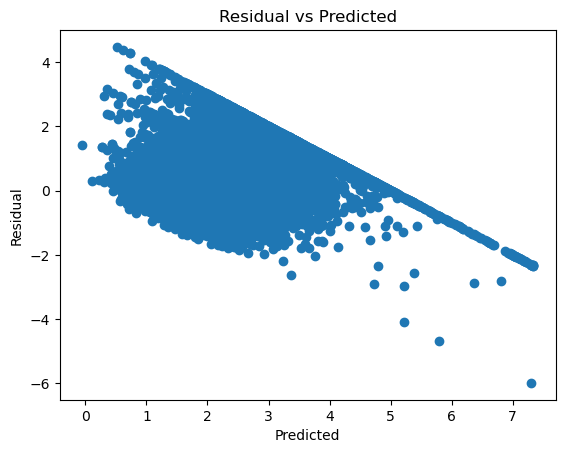

In [15]:
pred=model.predict(x_train)
residual=y_train-pred
plt.scatter(pred,residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs Predicted')
plt.show()

In [16]:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(residual)
print(dw)

1.968849888929722


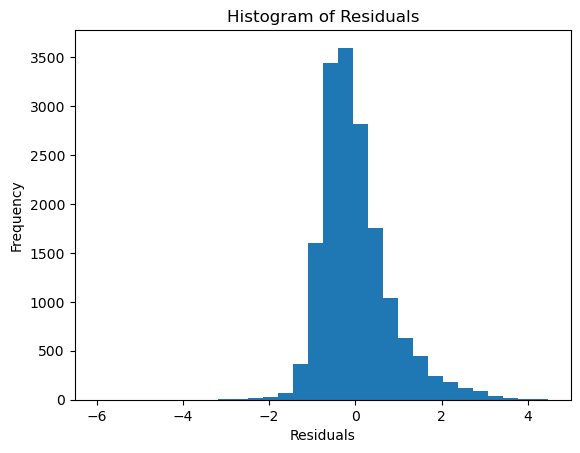

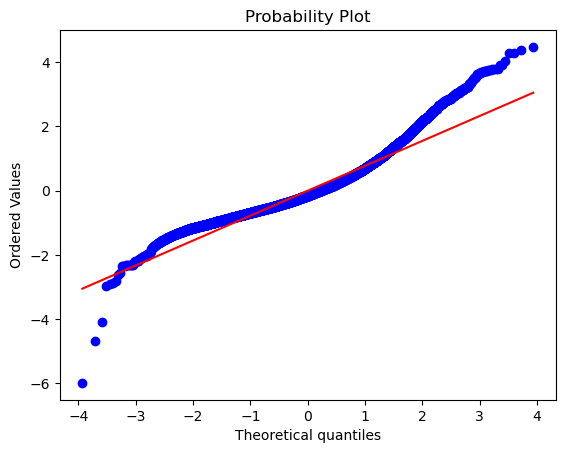

In [17]:
import scipy.stats as stats

plt.hist(residual,bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
plt.show()

stats.probplot(residual,dist='norm',plot=plt)
plt.show()

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
r_sq=r2_score(y_test,prediction)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r_sq)

mean_squared_error : 0.6596869325796549
root_mean_squared_error : 0.8122111379312986
r2_score : 0.49657935535116493


In [19]:
import pickle

# Save the model
pickle.dump(model, open('house_prediction.pkl', 'wb'))

# Load the model to check
loaded_model = pickle.load(open('house_prediction.pkl', 'rb'))
loaded_model


LinearRegression()